In [1]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 데이터 전처리

df = pd.read_csv('../train.csv')
df_raw = df.copy()

# Ex~Po의 등급을 가진 변수들은 모두 숫자로 바꿔줌. NA값은 무조건 0으로 만들어줌

cat_num_ls=['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'SalePrice']

tonum = {"ExterQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "ExterCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "HeatingQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "KitchenQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "PoolQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         
        }

df_raw= df_raw.replace(tonum)

# NA 값 처리

def nan_check(df_raw):
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    # None 값이 있는 column만 가져옴.
    null_count = null_count.query('NaN > 0')
    return(null_count)

def nan_check2(df_raw):
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    # None 값이 없는 column만 가져옴.
    null_count = null_count.query('NaN == 0')
    return(null_count)

# nan값이 있는 컬럼 이름을 가진 리스트 (13개)
nan_ls = list(set(nan_check(df_raw)['column']) - set(nan_check2(df_raw)['column']))
nan_ls
# description 직접 보면서 결측값이 뭔지 확인

# NA값이 판단된 카테고리 값에 대해 NA에 N이라는 값을 부여 (=N이라는 클래스를 부여)

fill_na_ls = [['GarageType',
 'MiscFeature',
 'BsmtFinType1',
 'Fence',
 'GarageFinish',
 'BsmtExposure',
 'Alley',
 'BsmtFinType2']
]

for name in fill_na_ls:
    df_raw[name] = df_raw[name].fillna('N')

# 원본 데이터 df
# 전처리 마친 데이터 df_raw

In [3]:
df_raw

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,N,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,N,IR1,Lvl,AllPub,...,0,0,N,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,1,2008,WD,Normal,118000


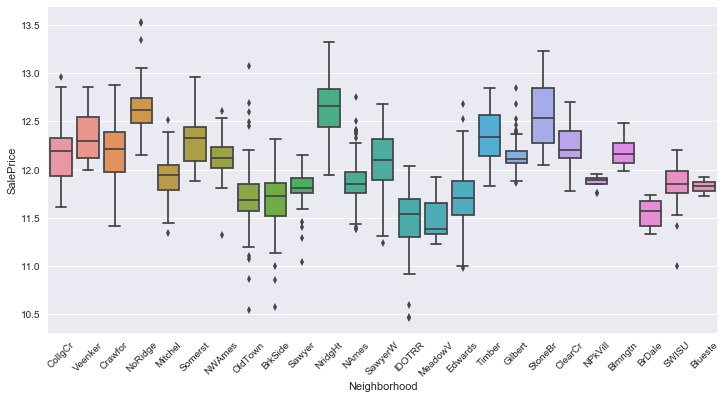

In [4]:
df_raw["SalePrice"] = np.log1p(df_raw["SalePrice"])
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df_raw)
xt = plt.xticks(rotation=45)


In [5]:
df_raw['Neighborhood']
nbhd =  df.groupby(['Neighborhood'])["SalePrice"].median().reset_index(name='Median').sort_values('Median').reset_index(drop=True)  ## 데이터별로 카운팅된 DF
for idx in range(len(df_raw)):
    for i in range(len(nbhd)):
        if df_raw['Neighborhood'][idx] == nbhd['Neighborhood'][i]:
            df_raw.at[idx,'Neighborhood'] =  int(nbhd['Median'][i])
            
df_raw['Neighborhood'].astype(float)           


0       197200.0
1       218000.0
2       197200.0
3       200624.0
4       301500.0
5       153500.0
6       225500.0
7       182900.0
8       119000.0
9       124300.0
10      135000.0
11      315000.0
12      135000.0
13      197200.0
14      140000.0
15      124300.0
16      140000.0
17      135000.0
18      179900.0
19      140000.0
20      315000.0
21      103000.0
22      197200.0
23       88000.0
24      135000.0
25      315000.0
26      140000.0
27      315000.0
28      140000.0
29      124300.0
          ...   
1430    181000.0
1431    146000.0
1432    119000.0
1433    181000.0
1434    153500.0
1435    140000.0
1436    140000.0
1437    315000.0
1438    119000.0
1439    182900.0
1440    200624.0
1441    197200.0
1442    225500.0
1443    124300.0
1444    197200.0
1445    135000.0
1446    153500.0
1447    197200.0
1448    121750.0
1449     88000.0
1450    140000.0
1451    225500.0
1452    121750.0
1453    153500.0
1454    225500.0
1455    181000.0
1456    182900.0
1457    200624

In [6]:
df_raw['Neighborhood'] = getattr(df_raw['Neighborhood'], "tolist", lambda x=df_raw['Neighborhood']: x)()

In [7]:
model = sm.OLS.from_formula("SalePrice ~ scale(Neighborhood)", data=df_raw)
result = model.fit()
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     1748.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          9.64e-252
Time:                        16:43:11   Log-Likelihood:                -156.15
No. Observations:                1460   AIC:                             316.3
Df Residuals:                    1458   BIC:                             326.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0241    

In [10]:
df_raw["SalePrice"] = np.log1p(df_raw["SalePrice"])
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Neighborhood', y = 'SalePrice',  data = df_raw)
xt = plt.xticks(rotation=45)


AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [9]:
model = sm.OLS.from_formula("SalePrice ~ C(Neighborhood)", data=df)
result = model.fit()
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          1.56e-225
Time:                        16:50:25   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           